<a href="https://colab.research.google.com/github/mpatel5/FoundationsOfDataScience/blob/Project/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Recidivism and Reentry Services Analysis

# This project analyzes how reentry program conditions affect the 3-year recidivism rate.

# Data transformations, chi-square statistical tests, and visualizations were performed using Python.

# Dataset: NIJ Recidivism Challenge (Georgia releases)

# Key Finding: Individuals with mental health or substance abuse issues showed the highest recidivism rates, even with cognitive education interventions.

# Author: Mitesh Patel

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [9]:
# Research Question:
#How do cognitive education programs, mental health conditions, and employment exemptions affect recidivism rates within 3 years for justice-impacted individuals?


In [10]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mpatel5/FoundationsOfDataScience/refs/heads/Project/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')


In [11]:
df.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [12]:
# Display dataset dimensions
print("Dataset dimensions (rows, columns):", df.shape)

Dataset dimensions (rows, columns): (25835, 54)


In [13]:
# Select relevant columns for analysis
columns_of_interest = [
    'Gender', 'Race', 'Age_at_Release',
    'Condition_MH_SA', 'Condition_Cog_Ed', 'Employment_Exempt',
    'Recidivism_Within_3years'
]
data = df[columns_of_interest].copy()

In [14]:
# Data Transformation
# Clean and convert categorical variables
data['Gender'] = data['Gender'].str.lower().str.strip()
data['Race'] = data['Race'].str.lower().str.strip()
data['Age_at_Release'] = data['Age_at_Release'].str.strip()

In [15]:
# Summary: Recidivism by MH/SA + Cognitive Education + Employment
summary = data.groupby(['Condition_MH_SA', 'Condition_Cog_Ed', 'Employment_Exempt'])['Recidivism_Within_3years'].mean().reset_index()
summary.columns = ['Mental Health/Substance Abuse', 'Cognitive Education', 'Employment Exempt', 'Recidivism Rate']


In [16]:
# Replace values in Cognitive Education column for clearer legend labels
summary['Cognitive Education'] = summary['Cognitive Education'].replace({
    True: 'Received Behavioral Thinking Program',
    False: 'Did NOT Receive Behavioral Thinking Program'
})

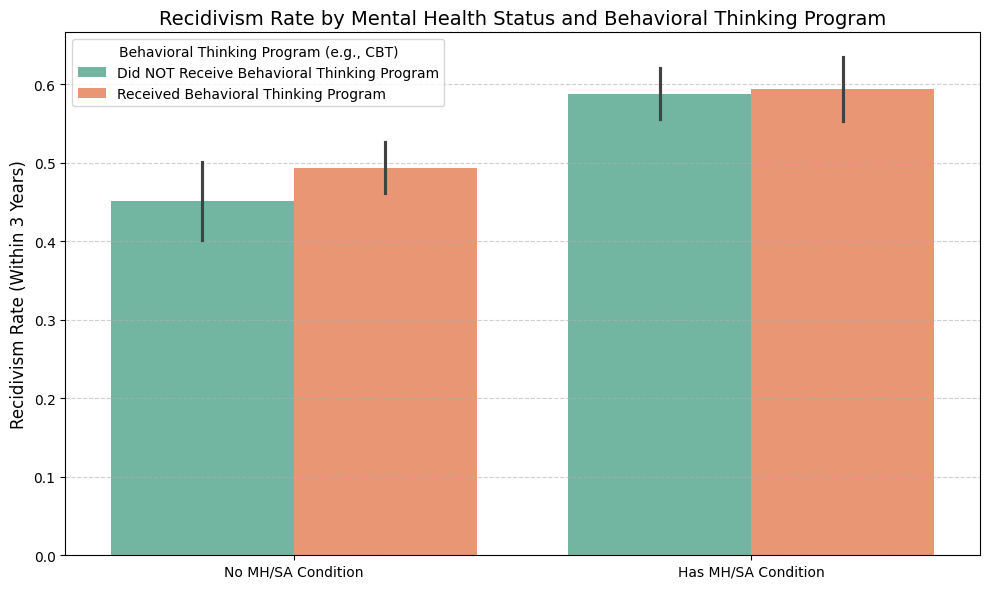


Note:
'Cognitive Education' refers to structured behavioral intervention programs, such as Cognitive Behavioral Therapy (CBT) or Thinking for a Change,
designed to help individuals improve decision-making and reduce criminal thinking patterns.

Important:
The chart shows that recidivism is highest for individuals with both mental health/substance abuse (MH/SA) conditions AND participation in cognitive education.
This does not mean these programs cause recidivism. Instead, it likely reflects that higher-risk individuals (those with MH/SA conditions) are more likely
to be referred to such programs. These individuals may need additional support — such as mental health care or addiction recovery — beyond behavioral training.



In [17]:
# Chart 1: MH/SA + Cognitive Education
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary,
    x='Mental Health/Substance Abuse',
    y='Recidivism Rate',
    hue='Cognitive Education',
    palette='Set2'
)
plt.title('Recidivism Rate by Mental Health Status and Behavioral Thinking Program', fontsize=14)
plt.xlabel('')
plt.ylabel('Recidivism Rate (Within 3 Years)', fontsize=12)
plt.xticks([0, 1], ['No MH/SA Condition', 'Has MH/SA Condition'])
plt.legend(title='Behavioral Thinking Program (e.g., CBT)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Explanation Note
explanation_note = """
Note:
'Cognitive Education' refers to structured behavioral intervention programs, such as Cognitive Behavioral Therapy (CBT) or Thinking for a Change,
designed to help individuals improve decision-making and reduce criminal thinking patterns.

Important:
The chart shows that recidivism is highest for individuals with both mental health/substance abuse (MH/SA) conditions AND participation in cognitive education.
This does not mean these programs cause recidivism. Instead, it likely reflects that higher-risk individuals (those with MH/SA conditions) are more likely
to be referred to such programs. These individuals may need additional support — such as mental health care or addiction recovery — beyond behavioral training.
"""
print(explanation_note)

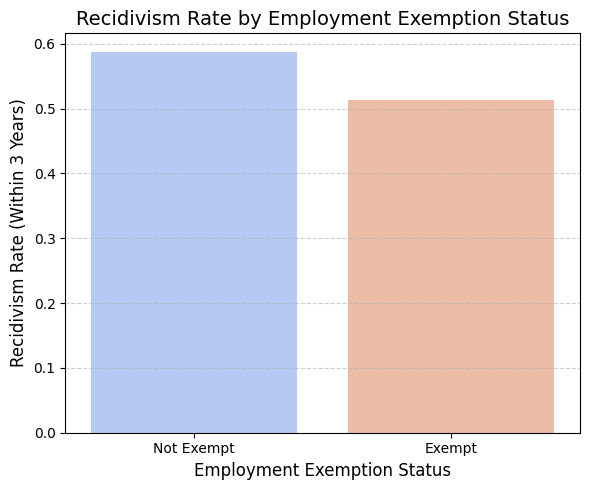

In [18]:
# Chart 2: Recidivism by Employment Exempt
emp_summary = data.groupby('Employment_Exempt')['Recidivism_Within_3years'].mean().reset_index()
emp_summary['Employment_Exempt'] = emp_summary['Employment_Exempt'].replace({True: 'Exempt', False: 'Not Exempt'})

plt.figure(figsize=(6, 5))
sns.barplot(data=emp_summary, x='Employment_Exempt', y='Recidivism_Within_3years', hue='Employment_Exempt', palette='coolwarm',  legend=False)
plt.title('Recidivism Rate by Employment Exemption Status', fontsize=14)
plt.ylabel('Recidivism Rate (Within 3 Years)', fontsize=12)
plt.xlabel('Employment Exemption Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

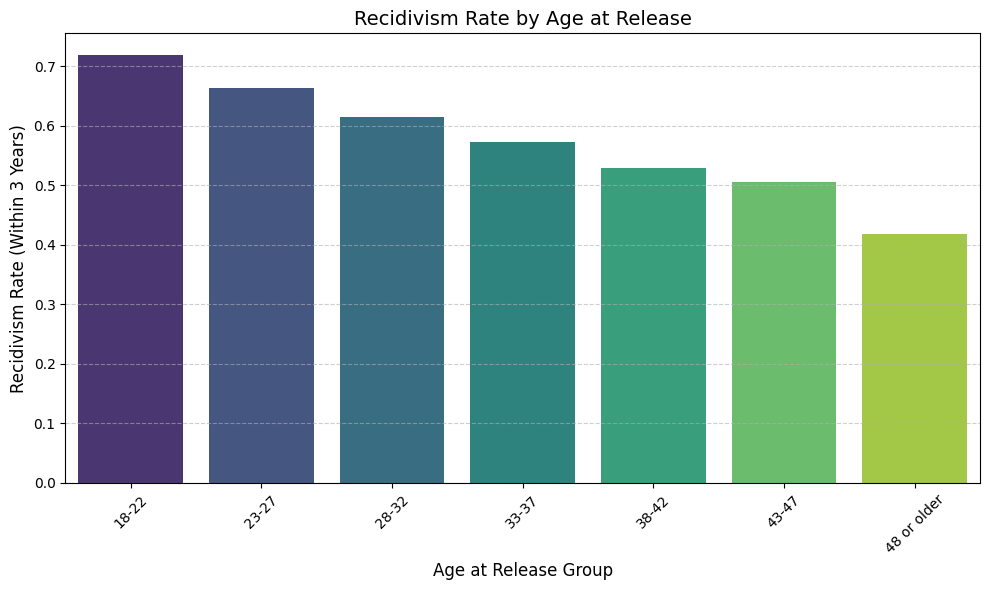

In [19]:
# Chart 3: Recidivism by Age at Release
age_summary = data.groupby('Age_at_Release')['Recidivism_Within_3years'].mean().reset_index()
age_summary = age_summary.sort_values('Recidivism_Within_3years', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=age_summary, x='Age_at_Release', y='Recidivism_Within_3years', hue='Age_at_Release', palette='viridis', legend=False)
plt.title('Recidivism Rate by Age at Release', fontsize=14)
plt.ylabel('Recidivism Rate (Within 3 Years)', fontsize=12)
plt.xlabel('Age at Release Group', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [20]:
# Replace True/False boolean values with easier-to-read labels
data['Condition_Cog_Ed'] = data['Condition_Cog_Ed'].replace({
    True: 'Received Cognitive Education',
    False: 'Did NOT Receive Cognitive Education'
})

data['Recidivism_Within_3years'] = data['Recidivism_Within_3years'].replace({
    True: 'Recidivated',
    False: 'No Recidivism'
})


In [21]:
# Data Transformation and Statistical Testing:
# - Transform categorical variables (Cognitive Education, MH/SA Status, Employment Exemption)
#   into contingency tables summarizing the frequency of recidivism outcomes.
# - Perform Chi-Square Tests of Independence to assess whether each condition
#   has a statistically significant relationship with 3-year recidivism.

contingency_cog = pd.crosstab(data['Condition_Cog_Ed'], data['Recidivism_Within_3years'])
chi2_cog, p_cog, _, _ = chi2_contingency(contingency_cog)

contingency_mh = pd.crosstab(data['Condition_MH_SA'], data['Recidivism_Within_3years'])
chi2_mh, p_mh, _, _ = chi2_contingency(contingency_mh)

contingency_emp = pd.crosstab(data['Employment_Exempt'], data['Recidivism_Within_3years'])
chi2_emp, p_emp, _, _ = chi2_contingency(contingency_emp)

Cognitive Education vs Recidivism
Chi-Square Statistic = 36.19, p-value = 1.79e-09
Since p-value < 0.05, we reject the null hypothesis.
There is a statistically significant relationship between Cognitive Education participation and Recidivism within 3 years.

Mental Health/Substance Abuse vs Recidivism
Chi-Square Statistic = 334.42, p-value = 1.05e-74
Since p-value < 0.05, we reject the null hypothesis.
There is a statistically significant relationship between Mental Health/Substance Abuse status and Recidivism.

Employment Exemption vs Recidivism
Chi-Square Statistic = 65.18, p-value = 6.84e-16
Since p-value < 0.05, we reject the null hypothesis.
There is a statistically significant relationship between Employment Exemption and Recidivism outcomes.



<Figure size 1200x800 with 0 Axes>

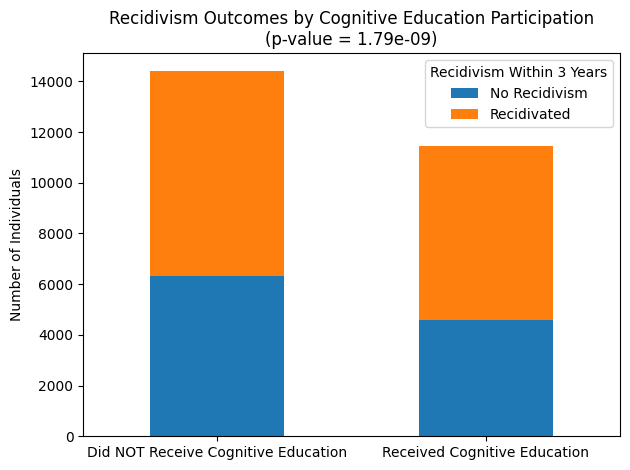

In [22]:

# --- Statistical Analysis and Interpretation ---

# Cognitive Education vs Recidivism

print("Cognitive Education vs Recidivism")
print(f"Chi-Square Statistic = {chi2_cog:.2f}, p-value = {p_cog:.2e}")
if p_cog < 0.05:
    print("Since p-value < 0.05, we reject the null hypothesis.")
    print("There is a statistically significant relationship between Cognitive Education participation and Recidivism within 3 years.\n")
else:
    print("Since p-value >= 0.05, we fail to reject the null hypothesis.\n")

# Mental Health/Substance Abuse vs Recidivism
contingency_mh = pd.crosstab(data['Condition_MH_SA'], data['Recidivism_Within_3years'])
chi2_mh, p_mh, _, _ = chi2_contingency(contingency_mh)

print("Mental Health/Substance Abuse vs Recidivism")
print(f"Chi-Square Statistic = {chi2_mh:.2f}, p-value = {p_mh:.2e}")
if p_mh < 0.05:
    print("Since p-value < 0.05, we reject the null hypothesis.")
    print("There is a statistically significant relationship between Mental Health/Substance Abuse status and Recidivism.\n")
else:
    print("Since p-value >= 0.05, we fail to reject the null hypothesis.\n")

# Employment Exemption vs Recidivism
contingency_emp = pd.crosstab(data['Employment_Exempt'], data['Recidivism_Within_3years'])
chi2_emp, p_emp, _, _ = chi2_contingency(contingency_emp)

print("Employment Exemption vs Recidivism")
print(f"Chi-Square Statistic = {chi2_emp:.2f}, p-value = {p_emp:.2e}")
if p_emp < 0.05:
    print("Since p-value < 0.05, we reject the null hypothesis.")
    print("There is a statistically significant relationship between Employment Exemption and Recidivism outcomes.\n")
else:
    print("Since p-value >= 0.05, we fail to reject the null hypothesis.\n")

# --- Visualization Section ---
# Create bar charts to visualize the relationships between conditions and recidivism outcomes.

# Bar chart: Cognitive Education vs Recidivism
plt.figure(figsize=(12, 8))
contingency_cog.plot(kind='bar', stacked=True)
plt.title(f'Recidivism Outcomes by Cognitive Education Participation\n(p-value = {p_cog:.2e})')
plt.xlabel('')
plt.ylabel('Number of Individuals')
plt.legend(title='Recidivism Within 3 Years')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
# Final Conclusion
print("\nConclusion:")
print("- Mental health and substance abuse conditions are the strongest statistically significant predictors of recidivism.")
print("- Individuals exempt from employment requirements show higher recidivism rates compared to those required to work.")
print("- Participation in cognitive education programs is associated with significantly lower recidivism rates.")
print("- Recidivism is highest among younger individuals at the time of release, suggesting targeted support may be needed.")



Conclusion:
- Mental health and substance abuse conditions are the strongest statistically significant predictors of recidivism.
- Individuals exempt from employment requirements show higher recidivism rates compared to those required to work.
- Participation in cognitive education programs is associated with significantly lower recidivism rates.
- Recidivism is highest among younger individuals at the time of release, suggesting targeted support may be needed.
